In [3]:
import numpy as np
import pandas as pd
import math

from numpy.random import rand as rand
from numpy.random import seed as seed
import matplotlib.pyplot as plt
from IPython.display import clear_output

#import linear_regression as LR
import sys


sys.path.append('..')
#from misc.utils import MyUtils

In [4]:
df_X_train = pd.read_csv('houseprice/x_train.csv', header=None)
df_y_train = pd.read_csv('houseprice/y_train.csv', header=None)
df_X_test = pd.read_csv('houseprice/x_test.csv', header=None)
df_y_test = pd.read_csv('houseprice/y_test.csv', header=None)

X_train = df_X_train.to_numpy()
X_test = df_X_test.to_numpy()
n_train = X_train.shape[0]

X_all = MyUtils.normalize_0_1(np.concatenate((X_train, X_test), axis=0))
X_train = X_all[:n_train]
X_test = X_all[n_train:]

y_train = df_y_train.to_numpy()
y_test = df_y_test.to_numpy()


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#print(y_test)

(404, 13)
(404, 1)
(102, 13)
(102, 1)


In [5]:
z_r = 3

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train, CF = True, lam = 1, eta = 0.005, epochs = 10000, degree = 3)
print(lr.w.shape)

(560, 1)


In [47]:
print(lr.w)

[[4.47320962e-03]
 [1.15628146e-04]
 [6.79842548e-04]
 [1.52627888e-03]
 [3.51544912e-04]
 [1.39162716e-03]
 [2.48977008e-03]
 [2.85258440e-03]
 [1.14833532e-03]
 [1.37996742e-03]
 [1.60627838e-03]
 [2.58346324e-03]
 [4.14817702e-03]
 [1.09003364e-03]
 [2.61933407e-05]
 [5.45948269e-07]
 [7.22962876e-05]
 [8.61413793e-06]
 [6.63228082e-05]
 [5.33785219e-05]
 [1.05575604e-04]
 [8.33987020e-06]
 [1.04003469e-04]
 [9.72533408e-05]
 [8.83654378e-05]
 [8.12887556e-05]
 [5.16124942e-05]
 [4.30453335e-04]
 [7.27089322e-05]
 [3.89214971e-05]
 [6.50538728e-05]
 [4.39404345e-04]
 [2.24422134e-04]
 [3.17100267e-04]
 [8.18195270e-05]
 [1.40468724e-04]
 [2.67542428e-04]
 [6.67285214e-04]
 [7.79409066e-05]
 [7.92296020e-04]
 [1.49772803e-04]
 [6.62689612e-04]
 [7.78764832e-04]
 [1.17593873e-03]
 [2.55071483e-04]
 [6.92573823e-04]
 [7.73202913e-04]
 [9.86318668e-04]
 [1.34138048e-03]
 [4.82074830e-04]
 [3.51544912e-04]
 [1.33151453e-04]
 [2.08776724e-04]
 [2.62397126e-04]
 [6.43163831e-05]
 [1.316759

In [71]:
print(lr.error(X_train, y_train))
print(lr.error(X_test, y_test))


7.698056281493534
17.088580720789338


In [10]:
print(X_test.shape)

(102, 13)


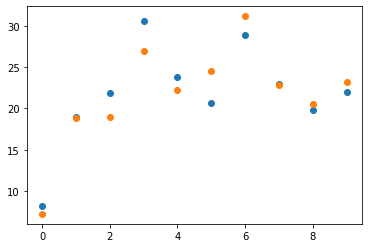

In [11]:
plt.scatter(range(lr.predict(X_test[0:10:]).shape[0]), lr.predict(X_test)[0:10:])
plt.scatter(range(y_test[0:10:].shape[0]), y_test[0:10:])

In [21]:
plt.scatter(np.arange(len(lr.MSE)-400000), lr.MSE[400000:], marker='.')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'MSE'

In [134]:

class LinearRegression:
    def __init__(self):
        self.w = None   # The (d+1) x 1 numpy array weight matrix
        self.degree = 1
        
        
    def fit(self, X, y, CF = True, lam = 0, eta = 0.01, epochs = 1000, degree = 1):
        ''' Find the fitting weight vector and save it in self.w. 
            
            parameters: 
                X: n x d matrix of samples, n samples, each has d features, excluding the bias feature
                y: n x 1 matrix of lables
                CF: True - use the closed-form method. False - use the gradient descent based method
                lam: the ridge regression parameter for regularization
                eta: the learning rate used in gradient descent
                epochs: the maximum epochs used in gradient descent
                degree: the degree of the Z-space
        '''
        self.degree = degree
        X = MyUtils.z_transform(X, degree = self.degree)
        if CF:
            # Set degree = 3 
            # Set lam = 0.02211
            self._fit_cf(X, y, lam)
        else: 
            self._fit_gd(X, y, lam, eta, epochs)
 


            
    def _fit_cf(self, X, y, lam = 0):
        ''' Compute the weight vector using the closed-form method.
            Save the result in self.w
        
            X: n x d matrix, n samples, each has d features, excluding the bias feature
            y: n x 1 matrix of labels. Each element is the label of each sample. 
        '''
        
        # add bias column 
        X = np.insert(X, 0, 1, axis=1)
        # attain the X transpose
        X_T = np.transpose(X)
        
        n, d = np.shape(X)
        
        # Create the Identity Matrx: 
        I = np.identity(d)
       
        # Create (X^T * X)^-1
        a = (np.linalg.pinv(X_T @ X + lam * I))
        # Create X_T * y 
        b = X_T @ y 

        # Set w_star to create w_star: [X_T * y] * [X_T * y]
      
        self.w = a @ b
        

        ## delete the `pass` statement below.
        ## enter your code here that implements the closed-form method for
        ## linear regression 
        
                


    
    # X --> The set used for training
    # y --> The correct values in the training set 
    # lamda --> The reguralizaiton to make it so it is neither bias nor too variant
    # epochs --> The number of times it jumps
    def _fit_gd(self, X, y, lam = 0, eta = 0.01, epochs = 1000):
        ''' Compute the weight vector using the gradient desecent based method.
            Save the result in self.w

            X: n x d matrix, n samples, each has d features, excluding the bias feature
            y: n x 1 matrix of labels. Each element is the label of each sample. 
        '''

        ## enter your code here that implements the gradient descent based method
        ## for linear regression 
        
        ### Fix Up X ###
        
        
        
        # Add Bias Column 
        X = np.insert(X, 0, 1, axis=1)
        
        # Create the Transposed X: X_T
        X_T = np.transpose(X)
        
        n, d = np.shape(X)
        
        
        ### Initialize Variables ### 
        
        # Initialize w to a (dx1)x1 vector
        
        
        # Initialize a: I - (2nu / N) * (X_T @ X)
        
        # Initialize the identity matrix 
        I = np.identity(d)
        #a = I - (((2 * eta) / n) * (X_T @ X ))
        a = I - (((2 * eta) / n) * (X_T @ X + (lam * I)))
        
        # Initialize b: (2nu/N)*X_T @ y
        b = (2 * eta / n) * (X_T @ y)
        
        ### Run For Loop ###
        for i in range(epochs):
            # Update w
            w_star = a @ w_star + b
            
        self.w = w_star
  

    
    def predict(self, X):
        ''' parameter:
                X: n x d matrix, the n samples, each has d features, excluding the bias feature
            return:
                n x 1 matrix, each matrix element is the regression value of each sample
        '''
        X = MyUtils.z_transform(X, degree = self.degree)
        
        # This takes X and inserts a 0 columnn (the bias) in the front
        X = np.insert(X, 0, 1, axis=1)

        return X @ self.w
        #for x in X:
            #out[i] = x @ self.w
           # i+= 1
 
        #return out

  
        
        ## enter your code here that produces the label vector for the given samples saved
        ## in the matrix X. Make sure your predication is calculated at the same Z
        ## space where you trained your model. 


        

    
    # The error method
    def error(self, X, y):
        ''' parameters:
                X: n x d matrix of future samples
                y: n x 1 matrix of labels
            return: 
                the MSE for this test set (X,y) using the trained model
        '''
        # Transform to the proper z space
        X = MyUtils.z_transform(X, degree = self.degree)
        
        # Add on a 0 column at the front
        X = np.insert(X, [0], 1, axis=1)
        
        # Get the shape of X
        n,d = np.shape(X)
        
        # Tranpose X
        X_T = np.transpose(X)
        
        # dot together x and w 
        xw = X @ self.w 
        
        
        # Apply and later return the error function
        error = np.sum((xw - y)** 2) / n
        
        return error
        ## enter your code here that calculates the MSE between your predicted
        ## label vector and the given label vector y, for the sample set saved in matraix x
        ## Make sure your predication is calculated at the same Z space where you trained your model. 

        




In [2]:
class MyUtils:
    def normalize_0_1(X):
        ''' Normalize the value of every feature into the [0,1] range, using formula: x = (x-x_min)/(x_max - x_min)
            1) First shift all feature values to be non-negative by subtracting the min of each column 
               if that min is negative.
            2) Then divide each feature value by the max of the column if that max is not zero. 
            
            X: n x d matrix of samples, excluding the x_0 = 1 feature. X can have negative numbers.
            return: the n x d matrix of samples where each feature value belongs to [0,1]
        '''

        n, d = X.shape
        X_norm = X.astype('float64') # Have a copy of the data in float

        for i in range(d):
            col_min = min(X_norm[:,i])
            col_max = max(X_norm[:,i])
            gap = col_max - col_min
            if gap:
                X_norm[:,i] = (X_norm[:,i] - col_min) / gap
            else:
                X_norm[:,i] = 0 #X_norm[:,i] - X_norm[:,i]
        
        return X_norm
    def normalize_neg1_pos1(X):
        ''' Normalize the value of every feature into the [-1,+1] range. 
            
            X: n x d matrix of samples, excluding the x_0 = 1 feature. X can have negative numbers.
            return: the n x d matrix of samples where each feature value belongs to [-1,1]
        '''

        n, d = X.shape
        X_norm = X.astype('float64') # Have a copy of the data in float

        for i in range(d):
            col_min = min(X_norm[:,i])
            col_max = max(X_norm[:,i])
            col_mid = (col_max + col_min) / 2
            gap = (col_max - col_min) / 2
            if gap:
                X_norm[:,i] = (X_norm[:,i] - col_mid) / gap
            else: 
                X_norm[:,i] = 0 #X_norm[:,i] - X_norm[:,i]

        return X_norm

    
    def z_transform(X, degree = 2):
        
        ''' Transforming traing samples to the Z space
            X: n x d matrix of samples, excluding the x_0 = 1 feature
            degree: the degree of the Z space
            return: the n x d' matrix of samples in the Z space, excluding the z_0 = 1 feature.
            It can be mathematically calculated: d' = \sum_{k=1}^{degree} (k+d-1) \choose (d-1)

        '''
 
        # Set r to degree
        r = degree
        
        # degree $leq$ 1, return x 
        if r <= 1:
            return X
        
        # n is the number of X's rows --> The number of points
        # d is the number of X's cols --> The dimensionality 
        n,d = np.shape(X)
        
        # Z is going to be a copy of x = Starts out exactly the same 
        Z = X.copy()
        
        
        
        # next it is necessary to create all of the buckets
        # a bucket is a matrix with all the possible combinations of multiplications which acheives a certain, single degree 
        # the # of buckets is conceptuall known d -r -1 Choose d - 1 
        # let's save those numbers in an array 
        
        #there will b r buckets 
        
        # B is a list with a bunch of buckets  
        B = []
        
        
        # the number of buckets 
        for i in range(r):
            # append a number - the ith bucket size which can be calculated w/ this equation
            # math.comb = n choose k 
            m = d+i # 0-based indexing t.f. the -1 is gone, d is the size of the X matrix 
            k = d-1 
            B.append(math.comb(m,k))
    
   
        ell = np.arange(np.sum(B)) # The summation of all the elements in the B array

        q = 0 # the total size of all of the buckets before the previous bucket
        
        p = d # the size of the previous bucket
        g = p
        
        # at the beginning, there is one bucket 
        for i in range(1, r): # 1, 2, 3, ... r-1 
            
            # create each bucket up to the ith bucket, visit the previous bucket 
            #print("New I Loop\ni: ", i)
            # go through every element in the previous bucket - the range starting from q going to q+p 
            for j in range(q, p):
                head = ell[j]

        
                # this tracks the index of the new column
           
            
                # go from head to lexographically highest feature
                for k in range(head, d):

                    #elementwise multiplication
                    temp = (Z[: ,j] * X[:, k]).reshape(-1,1)
                    # insert new column temp on right side
                    Z = np.append(Z, temp, axis=1)
                    
                    # j is hte index of the column you are currently computing
                    ell[g] = k # just multiplied w/ x's k column

                    g += 1

            # adding previous bucket into p the new previous buck
            q = p 

            # the new previous bucket is going to be i which is the current i but will soon be updated 
            p += B[i] 
 

        
        assert Z.shape[1] == np.sum(B)
        
        return Z
    
    

In [8]:
import pandas as pd
# Create a dataframe with these columns: 
# Row ID 
# Gradient Descent or Closed Form
# Z-Degree
# Lamda
# Eta
# Epochs

# Test-Set Error
# Validation-Set Erro
# Over/underfitting/Quality
# Description 

#create the vectors 
df = pd.DataFrame(columns=('ID', 'isCF', 'Z-Degree', 'Lam', 'ETA', 'Epochs', 'Test_Set Error', 'Validation_Set Error'))
dic = {'ID': 0, 'isCF': True, 'Z-Degree': 2, 'Lam': .0001, 'ETA': .05, 'Epochs': 100000, 'Test_Set Error': 5.321, 'Validation_Set Error': 9.123}
df = df.append(dic, ignore_index=True)
df.to_csv("C://Users/Jordan/test-folder/school/years/ML/test.csv")





In [54]:
lr = LinearRegression()
import pandas as pd


#create the vectors 
df = pd.DataFrame(columns=('ID', 'isCF', 'Z-Degree', 'Lam', 'ETA', 'Epochs', 'Test_Set Error', 'Validation_Set Error'))
dic = {'ID': 0, 'isCF': True, 'Z-Degree': 2, 'Lam': .0001, 'ETA': .05, 'Epochs': 100000, 'Test_Set Error': 5.321, 'Validation_Set Error': 9.123}
df= df.append(dic, ignore_index=True)

# Return a dictionary with the parameters 

i = 0 
# Is it running I or GD
for b in [True, False]:
    # The z-space that it searches
    for z in [2, 3]:
        lam = 0
        # The Lamda that it tries
        while lam < .1:
            if(not b):
                eta = 0
                while eta < .1:
                    epochs = 50000
                    while epochs < 100000:
     
                        lr.fit(X_train, y_train, CF = False, lam = lam, eta = eta, epochs = epochs, degree = z)
                        result = {'ID': i, 'isCF': b, 'Z-Degree': z, 'Lam': lam, 'ETA': eta, 'Epochs': epochs, 'Test_Set Error': lr.error(X_train, y_train), 'Validation_Set Error': lr.error(X_test, y_test)}
                        df = df.append(result, ignore_index = True)
                        epochs += 100000
                
                    eta += .01
                        
            else: 
                lr.fit(X_train, y_train, CF = True, lam = lam, eta = -1, epochs = -1, degree = z)
                result = {'ID': i, 'isCF': b, 'Z-Degree': z, 'Lam': lam, 'ETA': 0, 'Epochs': 0, 'Test_Set Error': lr.error(X_train, y_train), 'Validation_Set Error': lr.error(X_test, y_test)}
                df = df.append(result, ignore_index = True)
           
              
             
            lam += .1
            
    i += 1
df.to_csv("C://Users/Jordan/test-folder/school/years/ML/output1_2.10.21_9.00.csv")


C:\Users\Jordan\AppData\Local\Temp/ipykernel_12336/3506432298.py:113: RuntimeWarning: overflow encountered in matmul
  w_star = a @ w_star + b
C:\Users\Jordan\AppData\Local\Temp/ipykernel_12336/3506432298.py:113: RuntimeWarning: invalid value encountered in matmul
  w_star = a @ w_star + b


In [74]:
lr = LinearRegression()
import pandas as pd


#create the vectors 
df = pd.DataFrame(columns=('ID', 'isCF', 'Z-Degree', 'Lam', 'Test_Set Error', 'Validation_Set Error', 'Total_Error'))
df= df.append(dic, ignore_index=True)

# Return a dictionary with the parameters 

i = 0 
# Is it running I or GD

# The z-space that it searches

lam = .0221
# The Lamda that it tries
while lam < .0222:
    lr.fit(X_train, y_train, CF = True, lam = lam, eta = -1, epochs = -1, degree = 3)
    train_error = lr.error(X_train, y_train)
    val_error = lr.error(X_test, y_test)
    tot_error = val_error + train_error
    result = {'ID': i, 'isCF': True, 'Z-Degree': 3, 'Lam': lam,'Test_Set Error': train_error, 'Validation_Set Error': val_error, 'Total_Error': tot_error }
    df = df.append(result, ignore_index = True) 
    lam += .00001
    
        
    i += 1
print("Break")
print(df)
print("Break")
#df.to_csv("C://Users/Jordan/test-folder/school/years/ML/cf_2.11.21_1.15.csv")


Break
    ID  isCF Z-Degree      Lam  Test_Set Error  Validation_Set Error  \
0    0  True        2  0.00010        5.321000              9.123000   
1    0  True        3  0.02210        4.122904              9.134032   
2    1  True        3  0.02211        4.123236              9.133700   
3    2  True        3  0.02212        4.123567              9.133369   
4    3  True        3  0.02213        4.123899              9.133038   
5    4  True        3  0.02214        4.124230              9.132708   
6    5  True        3  0.02215        4.124562              9.132379   
7    6  True        3  0.02216        4.124893              9.132050   
8    7  True        3  0.02217        4.125224              9.131722   
9    8  True        3  0.02218        4.125555              9.131395   
10   9  True        3  0.02219        4.125885              9.131068   
11  10  True        3  0.02220        4.126216              9.130742   

    Total_Error   ETA    Epochs  
0           NaN  0.05  

In [136]:
lr = LinearRegression()
# Best: lr.fit(X_train, y_train, CF = False, lam = 0, eta = 0.005, epochs = 100000, degree = z_r)
lr.fit(X_train, y_train, CF = False, lam = 0.004525, eta = 0.0516, epochs = 105100, degree = 3)
train_err = lr.error(X_train, y_train)
test_err = lr.error(X_test, y_test)
tot_err = train_err + test_err 

print("Train Error: ", train_err)
print("Test Error:  ", test_err)
print("Total Error: ", tot_err)
#Lam: 0.004525
#Eta: 0.05100
#Degree: 3 
#Epochs: 10516
#13.46886468613477


Train Error:  4.323842057078746
Test Error:   9.145022629056024
Total Error:  13.46886468613477


In [53]:
lr = LinearRegression()
# Best: lr.fit(X_train, y_train, CF = False, lam = 0, eta = 0.005, epochs = 100000, degree = z_r)
lr.fit(X_train, y_train, CF = True, lam = 0.2, eta = 0.0001, epochs = 105100, degree = 3)
train_err = lr.error(X_train, y_train)
test_err = lr.error(X_test, y_test)
tot_err = train_err + test_err 

print("Train Error: ", train_err)
print("Test Error:  ", test_err)
print("Total Error: ", tot_err)
#Lam: 0.004525
#Eta: 0.05100
#Degree: 3 
#Epochs: 10516
#13.46886468613477


Train Error:  5.997615303355979
Test Error:   12.283182292610926
Total Error:  18.280797595966906


In [13]:
from unittest import loader
import numpy as np
import pandas as pd
import math

from numpy.random import rand as rand
from numpy.random import seed as seed



def main():
    (X_train,y_train,X_test,y_test) = loadData()
    #testCF(X_train,y_train,X_test,y_test)
    testGD(X_train,y_train,X_test,y_test)

def testGD(X_train,y_train,X_test,y_test):
    errors = loadErrors('GD_Error.npz')
    threshold = 1
    row = 0

    for lam in [0,10]:
        for z_r in [1,2]:
            for eta in [0.01,0.001]:
                lr = LinearRegression() #Create a new lr object each time. No assumption made that the weights will reset.
                lr.fit(X_train, y_train, CF = False, lam = lam, eta = eta, epochs = 10000, degree = z_r)
                train_error = lr.error(X_train, y_train)
                test_error = lr.error(X_test, y_test)

                (mikes_train_error,mikes_test_error) = errors[row]
                row+=1
                if abs(mikes_test_error - test_error) > threshold or abs(mikes_train_error - train_error) > threshold:
                    print(f'For GD, and the following params:\nlam: {lam}, z_r: {z_r}, eta: {eta}')
                    print(f'Expected train/test error:\n{mikes_train_error}, {mikes_test_error}')
                    print(f'Found train/test error:\n{train_error}, {test_error}\n')
    print("Please note that for Gradient descent, 0 initialization of the weights is assumed.")

def testCF(X_train,y_train,X_test,y_test):
    errors = loadErrors('CF_Error.npz')
    threshold = 1
    row = 0
    print("Test")
    for lam in [0,0.1]:
        print("Test")
        for z_r in [1,2,4]:
            
            lr = LinearRegression() #Create a new lr object each time. No assumption made that the weights will reset.
            lr.fit(X_train, y_train, CF = True, lam = lam, eta = 0.01, epochs = 1000, degree = z_r)
            train_error = lr.error(X_train, y_train)
            test_error = lr.error(X_test, y_test)
            print("Test")
            (mikes_train_error,mikes_test_error) = errors[row]
            row+=1
            if abs(mikes_test_error - test_error) > threshold or abs(mikes_train_error - train_error) > threshold:
                print(f'For CF, and the following params:\nlam: {lam}, z_r: {z_r}')
                print(f'Expected train/test error:\n{mikes_train_error}, {mikes_test_error}')
                print(f'Found train/test error:\n{train_error}, {test_error}\n')
            print("Success")

def loadErrors(file):
    container = np.load(file)
    data = [container[key] for key in container]
    errors = np.array(data)
    return errors

def loadData():
    #Reads the files into pandas dataframes from the respective .csv files.
    df_X_train = pd.read_csv('houseprice/x_train.csv', header=None)
    df_y_train = pd.read_csv('houseprice/y_train.csv', header=None)
    df_X_test = pd.read_csv('houseprice/x_test.csv', header=None)
    df_y_test = pd.read_csv('houseprice/y_test.csv', header=None)

    #Convert the input data into numpy arrays and normalize.
    X_train = df_X_train.to_numpy()
    X_test = df_X_test.to_numpy()
    n_train = X_train.shape[0]

    X_all = MyUtils.normalize_0_1(np.concatenate((X_train, X_test), axis=0))
    X_train = X_all[:n_train]
    X_test = X_all[n_train:]

    y_train = df_y_train.to_numpy()
    y_test = df_y_test.to_numpy()

    #Insure that the data correctly loaded in.
    assert X_train.shape == (404, 13), "Incorrect input, expected (404, 13), found " + X_train.shape
    assert y_train.shape == (404,1), "Incorrect input, expected (404, 1), found " + y_train.shape
    assert X_test.shape  == (102,13), "Incorrect input, expected (102, 13), found " + X_test.shape
    assert y_test.shape  == (102,1), "Incorrect input, expected (102, 1), found " + y_test.shape

    return (X_train,y_train,X_test,y_test)

if __name__ == '__main__':
    print("Here")
    main()
main()

Here
Please note that for Gradient descent, 0 initialization of the weights is assumed.
Please note that for Gradient descent, 0 initialization of the weights is assumed.


In [14]:
lr = LinearRegression()
# Best: lr.fit(X_train, y_train, CF = False, lam = 0, eta = 0.005, epochs = 100000, degree = z_r)
lr.fit(X_train, y_train, CF = False, lam = 0, eta = 0.001, epochs = 10000, degree = 3)
train_err = lr.error(X_train, y_train)
test_err = lr.error(X_test, y_test)
tot_err = train_err + test_err 

print("Train Error: ", train_err)
print("Test Error:  ", test_err)
print("Total Error: ", tot_err)

Train Error:  14.157928627842745
Test Error:   23.762675222889214
Total Error:  37.92060385073196


C:\Users\Jordan\AppData\Local\Temp/ipykernel_12336/3506432298.py:113: RuntimeWarning: overflow encountered in matmul
  w_star = a @ w_star + b
C:\Users\Jordan\AppData\Local\Temp/ipykernel_12336/3506432298.py:113: RuntimeWarning: invalid value encountered in matmul
  w_star = a @ w_star + b


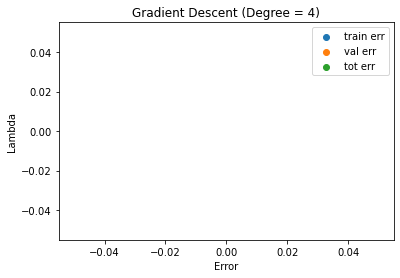

In [133]:
import numpy as np
import matplotlib.pyplot as plt
lr = LinearRegression()
degree = 4
lam = 0
x_coordinates = []
train_coordinates = []
test_coordinates = []
tot_coordinates = []
while lam < .025:
    #lr.fit(X_train, y_train, CF = False, lam =  lam, eta = .01, epochs = 100000, degree = degree)
    lr.fit(X_train, y_train, CF = False, lam = 0.004525, eta = 0.0516, epochs = 10000, degree = 4)
    train_err = lr.error(X_train, y_train)
    test_err = lr.error(X_test, y_test)
    tot_err = train_err + test_err
    if(train_err < 100 and test_err < 100):
        x_coordinates.append(lam)
        train_coordinates.append(train_err)
        test_coordinates.append(test_err)
        tot_coordinates.append(tot_err)
        
        
    lam += .025
    

txt = "Gradient Descent (Degree = {degree:.0f})"
plt.title(txt.format(degree = degree))
plt.xlabel("Error")
plt.ylabel("Lambda")
plt.scatter(x_coordinates, train_coordinates, label="train err")
plt.scatter(x_coordinates, test_coordinates, label="val err")
plt.scatter(x_coordinates, tot_coordinates, label="tot err")
leg = plt.legend(loc='upper right')
